<a href="https://colab.research.google.com/github/Mohd-Ali2/Projects/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importign libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Dataset**

In [2]:
df =  pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:, [3,4]].values

# **Finding Optimal Number of Clusters Using Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

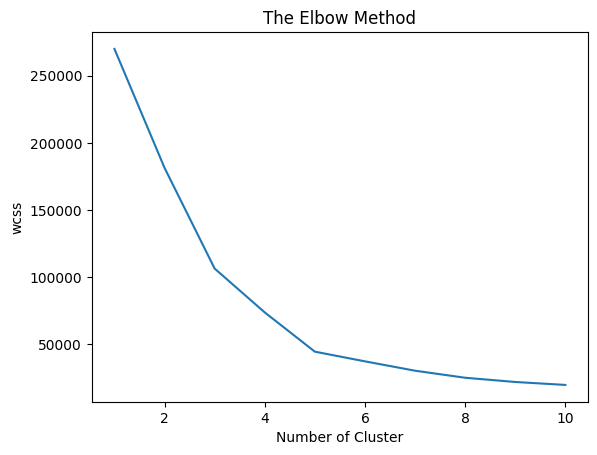

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

# **Training Dataset with K-Means**

In [7]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Visualising the Clusters**

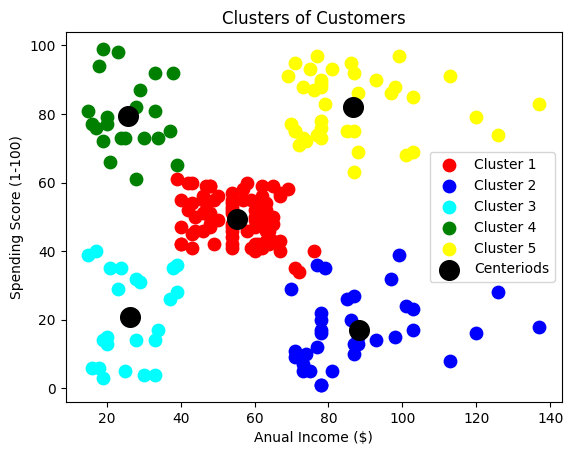

In [9]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1' )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2' )
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'cyan', label = 'Cluster 3' )
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'green', label = 'Cluster 4' )
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'yellow', label = 'Cluster 5' )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centeriods' )
plt.title('Clusters of Customers')
plt.xlabel('Anual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()